In [4]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers

In [5]:
%matplotlib inline

In [6]:
m = n = l = 4 # L of square grid

# With random field

In [7]:
from save_data import load_pickle_zip
model_ = load_pickle_zip("../models/models/2d_ferro_rh.pkl")
res_ex = load_pickle_zip("../models/solutions/2d_ferro_rh.pkl")

In [8]:
betas = res_ex["betas"]

In [9]:
import bp_nn_deep
import imp
imp.reload(bp_nn_deep)
neighs = bp_nn_deep.find_neigh(model_)
in_out_layers = bp_nn_deep.simplest_in_out(model_, neighs)
res_nn = solvers.nn_sol_deep(model_, betas,in_out_layers, neighs, max_step=2000, bias = True, 
                        batch_size=1000,)
res_nn["name"]="nn"

fe: -7.910 std_fe: 2.20E-02 M: 0.377 S: 0.594 E: -1.967: 0.382
fe: -5.337 std_fe: 1.85E-02 M: 0.648 S: 0.388 E: -3.399: 0.655
fe: -4.801 std_fe: 1.30E-02 M: 0.774 S: 0.251 E: -3.964: 0.773
fe: -4.622 std_fe: 9.78E-03 M: 0.844 S: 0.181 E: -4.169: 0.842
fe: -4.542 std_fe: 6.48E-03 M: 0.888 S: 0.139 E: -4.265: 0.892
fe: -4.500 std_fe: 4.62E-03 M: 0.915 S: 0.111 E: -4.315: 0.915
fe: -4.477 std_fe: 3.08E-03 M: 0.937 S: 0.089 E: -4.349: 0.938
fe: -4.462 std_fe: 1.69E-03 M: 0.953 S: 0.073 E: -4.371: 0.955
fe: -4.453 std_fe: 1.14E-04 M: 0.965 S: 0.058 E: -4.389: 0.966
fe: -4.447 std_fe: 1.24E-03 M: 0.973 S: 0.048 E: -4.399: 0.975
fe: -4.443 std_fe: 7.38E-05 M: 0.979 S: 0.040 E: -4.407: 0.979
fe: -4.441 std_fe: 5.44E-05 M: 0.984 S: 0.032 E: -4.414 0.986
fe: -4.439 std_fe: 5.28E-04 M: 0.988 S: 0.025 E: -4.419: 0.987
fe: -4.437 std_fe: 1.41E-04 M: 0.990 S: 0.022 E: -4.422 0.992
fe: -4.437 std_fe: 2.67E-04 M: 0.992 S: 0.018 E: -4.424 0.995
fe: -4.436 std_fe: 5.52E-05 M: 0.994 S: 0.015 E: -4.427 0.

In [10]:
res_nn_is = solvers.nn_sol_deep(model_, betas,in_out_layers, neighs, max_step=1000,
                           bias = True, i_sampling=True)
res_nn_is["name"]="nn_is"

fe: -7.910 std_fe: 2.94E-05 M: 0.374 S: 0.595 E: -1.963: 0.376
fe: -5.337 std_fe: 3.23E-05 M: 0.645 S: 0.389 E: -3.392: 0.649
fe: -4.802 std_fe: 3.38E-05 M: 0.770 S: 0.254 E: -3.956: 0.773
fe: -4.622 std_fe: 3.34E-05 M: 0.847 S: 0.178 E: -4.176: 0.835
fe: -4.542 std_fe: 3.27E-05 M: 0.888 S: 0.138 E: -4.266: 0.889
fe: -4.501 std_fe: 3.29E-05 M: 0.918 S: 0.109 E: -4.319: 0.918
fe: -4.477 std_fe: 2.57E-05 M: 0.939 S: 0.088 E: -4.351: 0.94
fe: -4.462 std_fe: 1.53E-05 M: 0.956 S: 0.069 E: -4.376: 0.953
fe: -4.453 std_fe: 2.07E-05 M: 0.964 S: 0.059 E: -4.387: 0.966
fe: -4.447 std_fe: 1.42E-06 M: 0.973 S: 0.049 E: -4.398: 0.973
fe: -4.443 std_fe: 1.24E-06 M: 0.978 S: 0.041 E: -4.406: 0.98
fe: -4.441 std_fe: 1.70E-06 M: 0.984 S: 0.032 E: -4.414: 0.985
fe: -4.439 std_fe: 6.80E-05 M: 0.987 S: 0.027 E: -4.418 0.987
fe: -4.437 std_fe: 1.31E-06 M: 0.990 S: 0.022 E: -4.422 0.992
fe: -4.437 std_fe: 1.94E-06 M: 0.992 S: 0.018 E: -4.425 0.993
fe: -4.436 std_fe: 1.71E-06 M: 0.994 S: 0.014 E: -4.427 0.99

In [11]:
import bp_solver
import imp
imp.reload(bp_solver)
import solvers
imp.reload(solvers)
res_bp = solvers.bp_sol(model_, betas)
res_bp["name"]="bp"

fe: -7.909, ener: -1.960, M: 0.375, iter 8
fe: -5.336, ener: -3.398, M: 0.647, iter 9
fe: -4.801, ener: -3.965, M: 0.773, iter 8
fe: -4.622, ener: -4.171, M: 0.844, iter 8
fe: -4.542, ener: -4.265, M: 0.888, iter 7
fe: -4.500, ener: -4.317, M: 0.917, iter 6
fe: -4.477, ener: -4.350, M: 0.938, iter 6
fe: -4.462, ener: -4.372, M: 0.953, iter 5
fe: -4.453, ener: -4.388, M: 0.965, iter 5
fe: -4.447, ener: -4.399, M: 0.973, iter 5
fe: -4.443, ener: -4.408, M: 0.979, iter 5
fe: -4.441, ener: -4.414, M: 0.984, iter 5
fe: -4.439, ener: -4.418, M: 0.988, iter 5
fe: -4.437, ener: -4.422, M: 0.990, iter 5
fe: -4.437, ener: -4.425, M: 0.992, iter 5
fe: -4.436, ener: -4.427, M: 0.994, iter 5
fe: -4.435, ener: -4.428, M: 0.995, iter 4
fe: -4.435, ener: -4.430, M: 0.996, iter 4
fe: -4.435, ener: -4.431, M: 0.997, iter 4
fe: -4.435, ener: -4.431, M: 0.998, iter 4


In [12]:
from save_data import save_pickle_zip
name_file="rfield_2d"
file_path = "./results/"+name_file + ".pkl"
all_res = {
    "nn":res_nn,
    "nn_is": res_nn_is,
    "bp":res_bp
}
save_pickle_zip(file_path, all_res)

# results

In [13]:
from save_data import load_pickle_zip
all_res = load_pickle_zip(file_path)
res_nn = all_res["nn"]
res_nn_is = all_res["nn_is"]
res_bp = all_res["bp"]

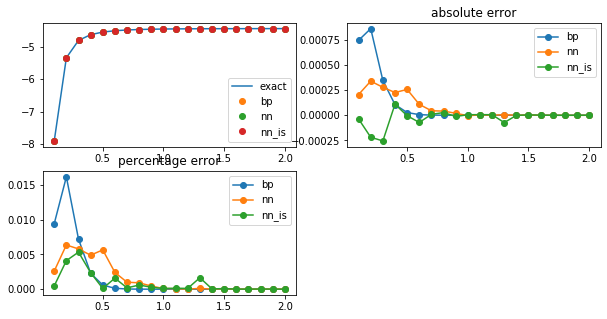

In [14]:
%matplotlib inline
label="fe"
import imp
imp.reload(solvers)
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is], init_=0)
#plt.ylim(-0.001,0.11)
plt.show()

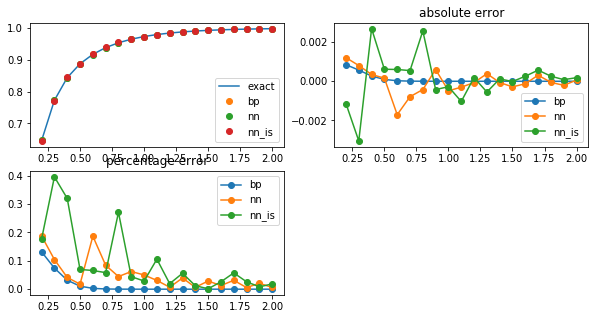

In [15]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is], init_=1)
plt.show()

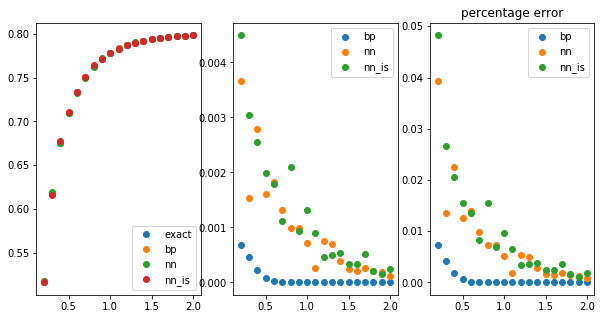

In [16]:
%matplotlib inline
label="M_i"
import imp
imp.reload(solvers)

plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn, res_nn_is], init_=1)
plt.show()

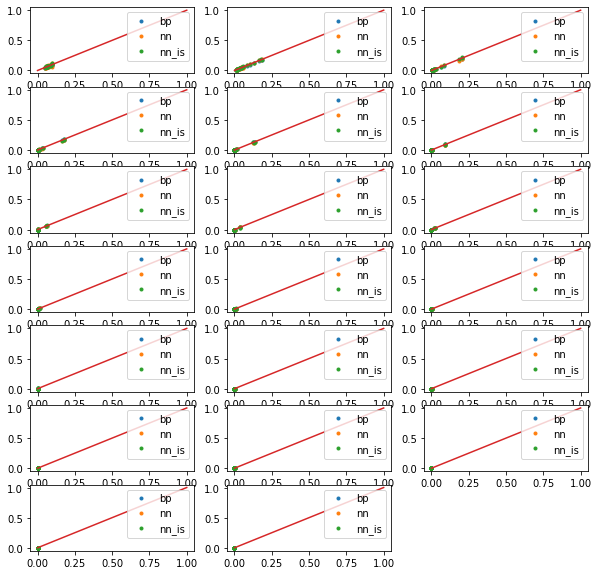

In [17]:
import solvers
imp.reload(solvers)
plt = solvers.plot_all_corr(betas, res_ex, [res_bp, res_nn, res_nn_is], model_.J_interaction)
plt.show()

NameError: name 'H' is not defined

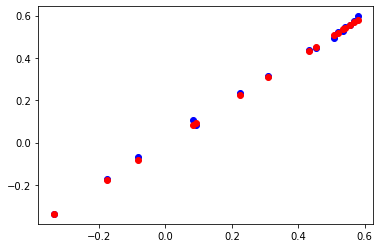

In [18]:
import matplotlib.pyplot as plt
plt.plot(res_ex["M_i"][0], res_nn["M_i"][0], "bo")
plt.plot(res_ex["M_i"][0], res_bp["M_i"][0], "ro")
plt.plot(res_ex["M_i"][0], np.tanh(1e-6*H), "go")


# Plots

In [ ]:
import matplotlib.pyplot as plt
init_ =1
name_file = "rf_2d.pdf"
label="fe"

others = [res_bp, res_nn, res_nn_is]
res_nn["name"] = "pair approx"
res_nn_is["name"] = "pair approx [is]"

plt.figure(figsize=(10,6))
ax1 = plt.subplot(221,)
ax1.set_ylabel("free energy")
plt.plot(res_ex["betas"][init_:], res_ex[label][init_:], label = "exact",
         color="black")
ax1.set_ylabel("free energy")

for other in others:
    plt.plot(other["betas"][init_:], other[label][init_:],"o", label=other["name"],)
plt.legend()
ax3 = plt.subplot(222)
for other in others:
    plt.plot(other["betas"][init_:], 100 * abs(other[label][init_:] - res_ex[label][init_:]) / abs(res_ex[label][init_:] +1e-10), "-o",
             label=other["name"])
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4,4))

ax3.set_ylabel("error [%]")
plt.legend()

label="M_i"

res_nn["name"] = "pair approx"

ax4 = plt.subplot(223,)
ax4.set_ylabel("<m>")
ax4.set_xlabel("beta")

ax4.plot(res_ex["betas"][init_:], abs(res_ex[label][init_:]).sum(axis=1)/model_.N,
             label="exact", color="black")
for other in others:
    ax4.plot(other["betas"][init_:], abs(other[label][init_:]).sum(axis=1)/model_.N, "o",
             label=other["name"])
plt.legend()

ax2 = plt.subplot(224)
ax2.ticklabel_format(axis='y', style='sci', scilimits=(-4,4))

for other in others:
    ax2.plot(other["betas"][init_:], abs(abs(other[label][init_:]) - abs(res_ex[label][init_:])).sum(axis=1)/model_.N, "o",
             label=other["name"])
ax2.legend()
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,4))

ax2.set_xlabel("beta")
ax2.set_ylabel("error")
plt.legend()
plt.savefig("./img/" + name_file)
plt.show